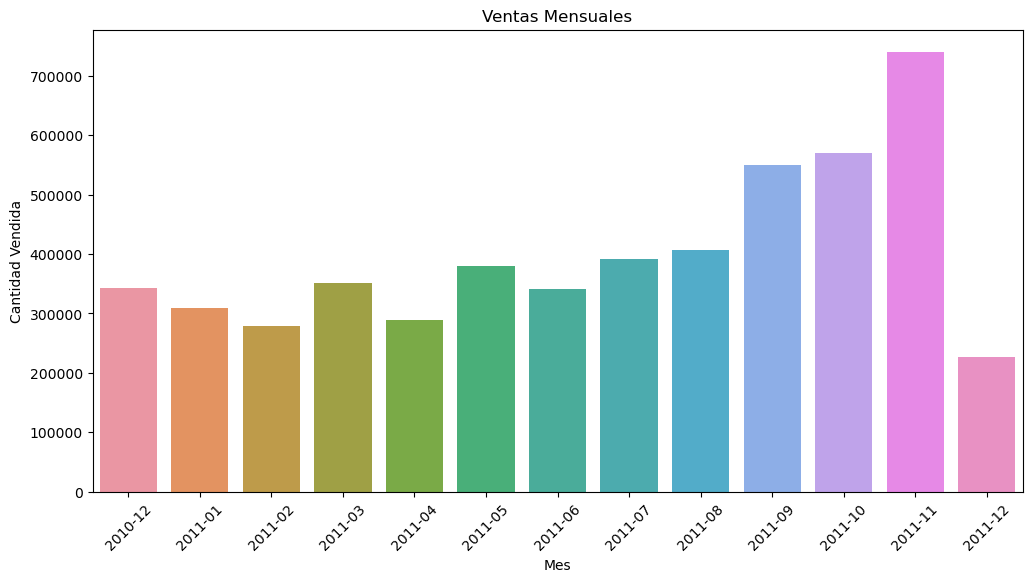

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset en un DataFrame
data = pd.read_csv('ecommerce_data/data.csv', encoding='ISO-8859-1')

# Convertir la columna 'InvoiceDate' a formato de fecha
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

# Crear una nueva columna para el año y el mes
data['YearMonth'] = data['InvoiceDate'].dt.to_period('M')

# Asegurarse de que 'Quantity' es de tipo numérico
data['Quantity'] = pd.to_numeric(data['Quantity'], errors='coerce')
# Agrupar por 'YearMonth' y sumar las cantidades
monthly_sales = data.groupby('YearMonth').sum(numeric_only=True)['Quantity']

# Visualizar las ventas mensuales
plt.figure(figsize=(12, 6))
sns.barplot(x=monthly_sales.index.astype(str), y=monthly_sales.values)
plt.xticks(rotation=45)
plt.title('Ventas Mensuales')
plt.xlabel('Mes')
plt.ylabel('Cantidad Vendida')
plt.show()


            Quantity  TotalPrice
Quantity    1.000000    0.539239
TotalPrice  0.539239    1.000000


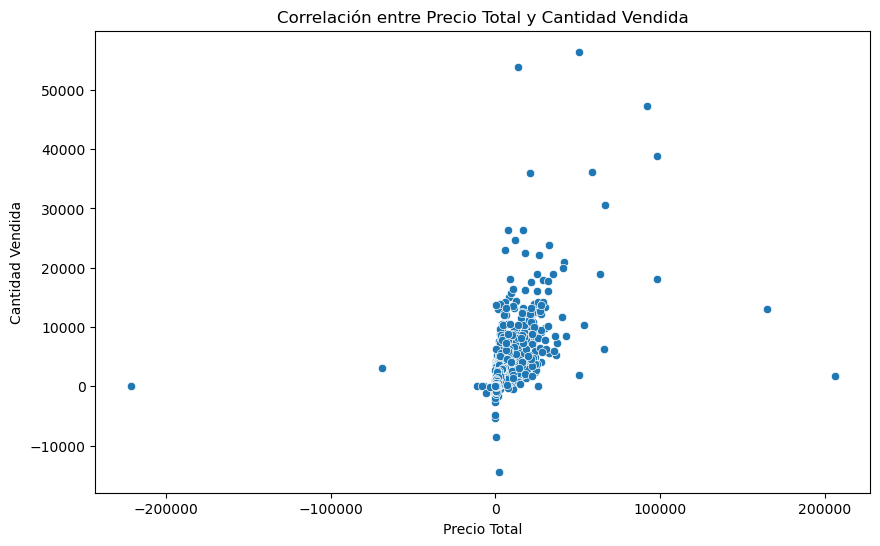

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset en un DataFrame
data = pd.read_csv('ecommerce_data/data.csv', encoding='ISO-8859-1')

# Convertir la columna 'InvoiceDate' a formato de fecha
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

# Crear una nueva columna para el año y el mes
data['YearMonth'] = data['InvoiceDate'].dt.to_period('M')

# Asegurarse de que 'Quantity' es de tipo numérico
data['Quantity'] = pd.to_numeric(data['Quantity'], errors='coerce')

# Asegurarse de que 'UnitPrice' es de tipo numérico
data['UnitPrice'] = pd.to_numeric(data['UnitPrice'], errors='coerce')

# Calcular el ingreso total por producto
data['TotalPrice'] = data['Quantity'] * data['UnitPrice']

# Agrupar por producto y calcular la correlación
product_sales = data.groupby('StockCode').agg({'Quantity': 'sum', 'TotalPrice': 'sum'})
correlation = product_sales.corr()
print(correlation)

# Visualizar la correlación
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TotalPrice', y='Quantity', data=product_sales)
plt.title('Correlación entre Precio Total y Cantidad Vendida')
plt.xlabel('Precio Total')
plt.ylabel('Cantidad Vendida')
plt.show()


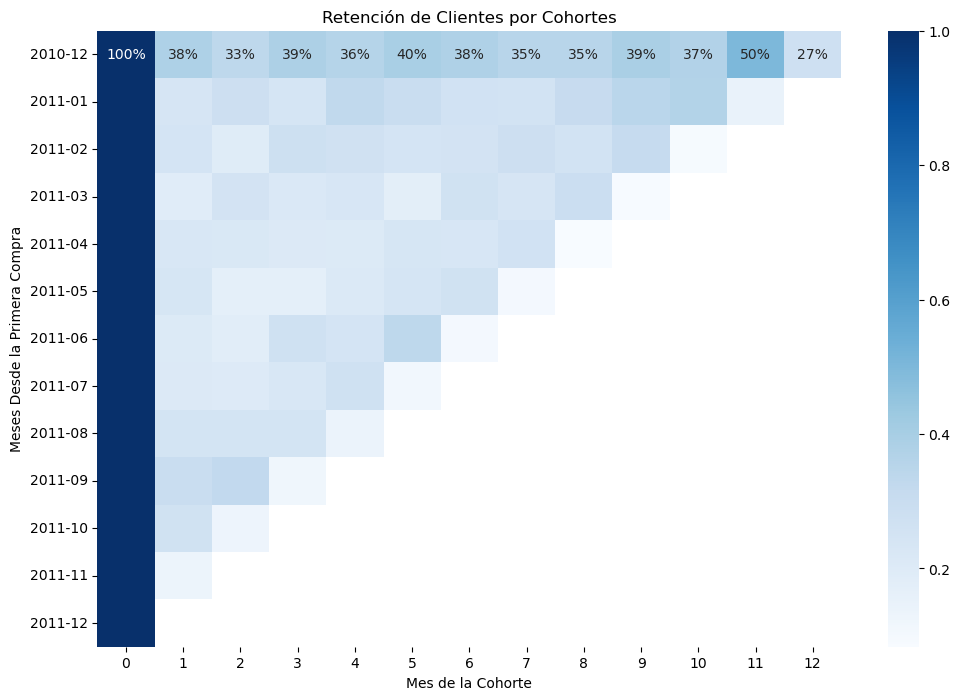

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset en un DataFrame
data = pd.read_csv('ecommerce_data/data.csv', encoding='ISO-8859-1')

# Convertir la columna 'InvoiceDate' a formato de fecha
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

# Identificar la fecha de la primera compra de cada cliente
data['CohortMonth'] = data.groupby('CustomerID')['InvoiceDate'].transform('min').dt.to_period('M')

# Crear un índice de cohorte y un período de compra
data['CohortIndex'] = (data['InvoiceDate'].dt.to_period('M').astype(int) - data['CohortMonth'].astype(int))

# Agrupar los datos por cohorte y período de compra
cohort_data = data.groupby(['CohortMonth', 'CohortIndex']).agg({
    'CustomerID': 'nunique',
    'Quantity': 'sum'
}).reset_index()

cohort_pivot = cohort_data.pivot(index='CohortMonth', columns='CohortIndex', values='CustomerID')
cohort_size = cohort_pivot.iloc[:, 0]

# Calcular la retención de clientes
retention = cohort_pivot.divide(cohort_size, axis=0)

# Visualizar la retención de clientes
plt.figure(figsize=(12, 8))
sns.heatmap(retention, annot=True, fmt='.0%', cmap='Blues')
plt.title('Retención de Clientes por Cohortes')
plt.xlabel('Mes de la Cohorte')
plt.ylabel('Meses Desde la Primera Compra')
plt.show()


In [1]:
import pandas as pd

# Cargar el dataset en un DataFrame
data = pd.read_csv('ecommerce_data/data.csv', encoding='ISO-8859-1')

# Mostrar el encabezado de la tabla
print(data.head())

# Esquematizar las columnas más relevantes si la tabla es muy extensa
print(data[['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country']].head())


  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom  
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset preprocesado en un DataFrame
data = pd.read_csv('data/preprocessed_data.csv', encoding='ISO-8859-1')

# Agrupar por 'YearMonth' y sumar las cantidades
monthly_sales = data.groupby('YearMonth').sum(numeric_only=True)['Quantity']

# Visualizar las ventas mensuales
plt.figure(figsize=(12, 6))
sns.barplot(x=monthly_sales.index.astype(str), y=monthly_sales.values)
plt.xticks(rotation=45)
plt.title('Ventas Mensuales')
plt.xlabel('Mes')
plt.ylabel('Cantidad Vendida')
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'data/preprocessed_data.csv'